In [1]:

from sklearn.datasets import load_digits
import numpy as np

#turn off warnings
import warnings
warnings.filterwarnings('ignore')

Load the digits dataset. Use the following documentation, and run preliminary data
analysis on it (features, samples, ranges, scales, variance, and any other information
that you find relevant).

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

Number of samples: 1797
Number of features: 64
Range of values for the features: [0.0, 16.0]
Mean scale of the features: 4.884164579855314
Standard deviation scale of the features: 6.016787548672236
Variance of the features: 36.20173240585726
Number of classes: 10
Number of samples per class: [178 182 177 183 181 182 181 179 174 180]


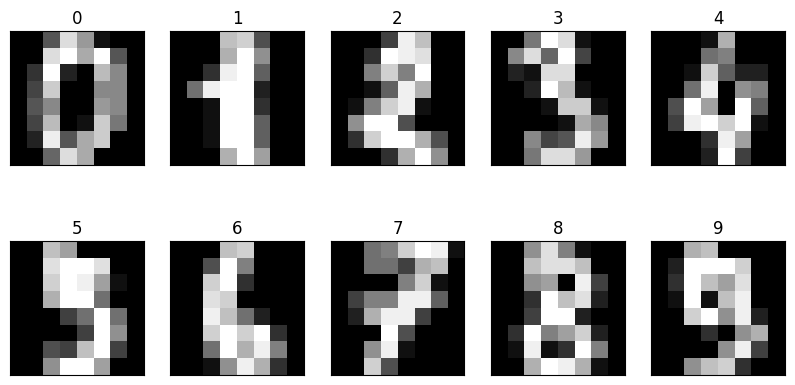

In [4]:
# Print the number of samples and features
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Print the range of values for the features
print("Range of values for the features: [{}, {}]".format(np.min(X), np.max(X)))

# Print the scale of the features (mean and standard deviation)
print("Mean scale of the features:", np.mean(X))
print("Standard deviation scale of the features:", np.std(X))

# Print the variance of the features
print("Variance of the features:", np.var(X))

# Print the number of classes
print("Number of classes:", len(np.unique(y)))

# Print the number of samples per class
print("Number of samples per class:", np.bincount(y))

# show an example of a digit for each class
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[y == i][0].reshape(8, 8), cmap='gray')
    ax.set(xticks=[], yticks=[], title=i)

plt.show()


Use sklearn function test train split to split the data to test-set and train-set, for
each test-size ratio r ∈ [0.1, 0.2, 0.3, ..., 0.9], and use skleran LogisticRegression to
train a logistic regressor on the train-set and evaluate the accuracy on the test-set. Use
matplotlib.pyplot to plot the accuracy of each r (using r as x axis and accuracy as
y axis).

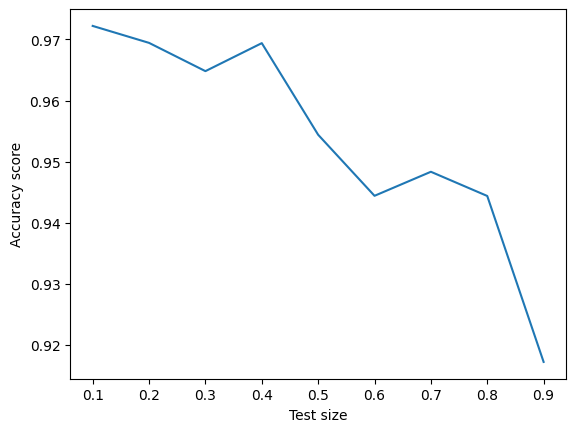

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9]
acc_score = []


for test_size in test_sizes:
    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    # init the logistic regression model
    model = LogisticRegression()
    # train the model
    model.fit(X_train, y_train)
    # calculate the model's score on the test set
    acc_score.append(model.score(X_test, y_test))

# plot the results
plt.plot(test_sizes, acc_score)
plt.xlabel('Test size')
plt.ylabel('Accuracy score')
plt.show()


The 1800 samples dataset is completely balanced (each label has 180 samples). Create
a sub-dataset from it, of size 1000, which is unbalanced.

In [6]:
sizes= [150,150,150,150,150,150,25,25,25,25]
# create the unbalanced data set
label_indices = [np.where(y == i)[0] for i in range(10)]
unbalaced_X = np.concatenate([X[label_indices[i][:sizes[i]]] for i in range(10)])
unbalaced_y = np.concatenate([y[label_indices[i][:sizes[i]]] for i in range(10)])

# Print the number of samples and the label distribution 
print("Number of samples:", unbalaced_X.shape[0])
print("Label distribution:", np.bincount(unbalaced_y))



Number of samples: 1000
Label distribution: [150 150 150 150 150 150  25  25  25  25]


Implement code for label balancing to take your new (sub)-dataset and generate a new
dataset with label balancing. Use the the following pseudo code:
First, find lmin: the number corresponding to the label that appears the least in the data.
Then, for each label in the dataset, randomly select only lmin samples and add them to the new dataset.
    
For the same values of r that you used in the previous part, split the balanced dataset
that you created into test-set and train-set, train a logistic regressor on the train-set,
and print the accuracy of the fitted (trained) logistic regressor on the test-set.

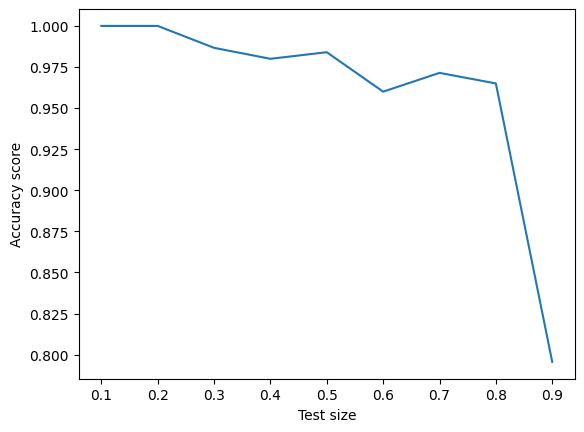

In [9]:
# find lmin: the number corresponding to the label that appears the least in the data
min_class = np.min(np.bincount(unbalaced_y))
# for each label in the dataset, randomly select only lmin samples and add them to the new dataset
balanced_X = np.concatenate([X[label_indices[i][:min_class]] for i in range(10)])
balanced_y = np.concatenate([y[label_indices[i][:min_class]] for i in range(10)])

acc_score = []

for test_size in test_sizes:
  #  split the balanced dataset that you created into test-set and train-set
    X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size=test_size, random_state=42)
    # init the logistic regression model
    model = LogisticRegression()
    # train the model
    model.fit(X_train, y_train)
    # calculate the model's score on the test set
    acc_score.append(model.score(X_test, y_test))

# plot the results
plt.plot(test_sizes, acc_score)
plt.xlabel('Test size')
plt.ylabel('Accuracy score')
plt.show()


Run a naıve k-features selection algorithm that for each set of k features from the data
trains a classifier on the train-set, and selects the set of k features that achieved the
best accuracy on the test-set. Implement a function that gets train-set, test-set,
and k and returns the best k features from the dataset and the accuracy achieved on
the test-set. Run the function with k = 2 and print the results.

In [10]:
from itertools import combinations
from tqdm import tqdm


def k_feature_select(X_train, X_test, y_train, y_test, k):
    best_features = None
    best_score = 0
    num_combinations = int(len(list(combinations(range(X_train.shape[1]), k))))
    with tqdm(total=num_combinations) as pbar:
        for comb in combinations(range(X_train.shape[1]), k):
            # get the accuracy score for the current combination
            model = LogisticRegression()
            model.fit(X_train[:, comb], y_train)
            acc_score = model.score(X_test[:, comb], y_test)
            if acc_score > best_score:
                best_score = acc_score
                best_features = comb
            pbar.update(1)
    return best_features, best_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_features, best_score = k_feature_select(X_train,X_test,y_train,y_test,2)



100%|██████████| 2016/2016 [02:13<00:00, 15.09it/s]


In [11]:
print("Best features:", best_features)
print("Best score:", best_score)

Best features: (21, 42)
Best score: 0.46944444444444444
